Text Mining and Image Processing
Hoja de trabajo No2  
Luis Adolfo Martínez
Carné:
**22000352** 

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import spacy
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import pkg_resources, imp
imp.reload(pkg_resources)

<module 'pkg_resources' from '/usr/local/lib/python3.7/dist-packages/pkg_resources/__init__.py'>

In [2]:
!python -m spacy download es_core_news_sm

2022-08-21 19:28:37.520044: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 5.0 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [3]:
import os.path
from os import path

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
direccion = "/content/drive/MyDrive/TextMining/Archivos"
os.chdir(direccion)

**Función para validar NA**

In [6]:
nlp_en = spacy.load('en_core_web_sm')
nlp_es = spacy.load("es_core_news_sm")

In [7]:
def validaNA(df):
  v = df.isnull().values.any()
  return v

**Cargamos los datos**

In [8]:
df_info = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', usecols=[2, 4, 5] , names=['FechaHora', 'Usuario', 'Twit'])
df_info.head()

,FechaHora,Usuario,Twit
0,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
df_info.shape

(1600000, 3)

In [10]:
patt= re.compile(r'@\w+')
mentions = pd.DataFrame(df_info.Twit.str.extractall(r'(@\w+)')[0]).value_counts().rename_axis('User').reset_index(name='Mentions')

Obtenemos Top 3 

In [11]:
top_user_tuit = mentions[0:3]
top_list = []
for user in range(len(top_user_tuit)):
  user= df_info.loc[df_info.Twit.str.contains(top_user_tuit.User[user])]
  user = user.reindex(columns = ['Twit', 'Usuario', 'FechaHora'])
  user['TwitLon'] = user.Twit.str.len()
  top_list.append(user)

In [12]:
top_uno = pd.DataFrame(top_list[0])


In [13]:
top_dos = pd.DataFrame(top_list[1])

In [14]:
top_tres = pd.DataFrame(top_list[2])

Validamo en los dataFrame de los top de usuario si hay NA

In [15]:
validaNA(top_uno['Usuario'])
validaNA(top_dos['Usuario'])
validaNA(top_dos['Usuario'])

False

In [16]:
top_uno.head()

,Twit,Usuario,FechaHora,TwitLon
1021,@mileycyrus hahaha dont be like that one time ...,kristenn_lynn,Mon Apr 06 23:30:57 PDT 2009,107
2014,"@mileycyrus i have the same problem, but it's ...",nathiuria,Tue Apr 07 00:45:20 PDT 2009,137
2073,@mileycyrus I guess counting sheep didn't work...,amyamoore,Tue Apr 07 00:49:07 PDT 2009,72
2080,@mileycyrus I would too if it meant spending a...,xdokkenx,Tue Apr 07 00:49:44 PDT 2009,100
2156,@mileycyrus AWWW u seriously have the cutest d...,XFearLessX,Tue Apr 07 00:56:41 PDT 2009,112


In [17]:
top_dos.head()

,Twit,Usuario,FechaHora,TwitLon
1690,@tommcfly hey saw u guys play @ pushover..didn...,mcsteph94,Tue Apr 07 00:19:09 PDT 2009,138
1789,@tommcfly Good morning Tom! Why can't I send y...,mcflyholland,Tue Apr 07 00:26:52 PDT 2009,131
2514,@tommcfly did you know that johnsons baby use ...,ckstarlet,Tue Apr 07 01:23:07 PDT 2009,96
3029,"@dougiemcfly @tommcfly good morning guys, how ...",McFLYBelgium,Tue Apr 07 02:03:41 PDT 2009,108
3524,"@tommcfly hey, no chance of adding brighton or...",lilmissvik,Tue Apr 07 02:46:02 PDT 2009,131


In [18]:
top_tres.head()

,Twit,Usuario,FechaHora,TwitLon
460,@ddlovato @David_Henrie ummmmm i cant find it.,toritor11,Mon Apr 06 22:51:34 PDT 2009,47
573,@ddlovato Do you hate us?? Please don't,lovatolover,Mon Apr 06 22:58:30 PDT 2009,40
7032,@ddlovato Wish that i could see it.. Thats th...,mariapersson,Tue Apr 07 07:02:58 PDT 2009,96
7089,"@ddlovato hey demi, wen are you and selena gon...",xxBEJEALOUSxx,Tue Apr 07 07:05:11 PDT 2009,79
8611,@ddlovato ahhhh i wish i could go to the dalla...,Julie_Dances,Fri Apr 17 20:31:31 PDT 2009,85


Normalización

In [19]:
def normalizacion_text(corpus):
  Corpus = []
  for doc in corpus:
      strX = re.sub(r'@\w+', '', doc).lower().strip().rstrip('\n').rstrip('\r\n')
      Corpus.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚ]', '', strX))
  return Corpus

In [20]:
corpus1 = normalizacion_text(top_uno.Twit)
corpus2 = normalizacion_text(top_dos.Twit)
corpus3 = normalizacion_text(top_tres.Twit)

In [21]:
corpus2

['hey saw u guys play  pushoverdidnt get 2 meet u tho cuz of th huge line  i was very upset  lola msg would make up 4 it',
 'good morning tom why cant i send you a message this is too short for the question i have  well to bad for me i guess',
 'did you know that johnsons baby use animals like cute bunnies to test their products',
 'good morning guys how are you all you know its frustrating i never get a reply',
 'hey no chance of adding brighton or eastbourne to the ucap tour gutted im missing out this time round  i love you guys',
 'have fun tom i need to buy eclipse too but i have no money sad timess',
 'are you coming to play at plymouth again this year cus i cant go to the ucap tour cus you arent coming anywhere near me  oxo',
 'o starbucks never tehe oooh now i want one',
 'aw i want a starbucks',
 'i have to still read eclipse as well dont watch twilight the movie though if you want to keep liking the books movies bad',
 'httptwitpiccom3iquy  i miss your old hairstyle daniel  bu

**Tokenización**

In [22]:
def tokenization(corpus):
  Corpus = []
  for doc in corpus:
      Corpus.append(nlp_en(doc))
  return Corpus

In [23]:
corpus_tonke1 = tokenization(corpus1)
corpus_tonke2 = tokenization(corpus2)
corpus_tonke3 = tokenization(corpus3)

Remove Stopwords

In [24]:
def removeStops(corpus):
  Corpus = []
  for doc in corpus:
    s = ""
    for token in doc:
      if(token.is_stop == False):
        s = s + token.text + " "
      Corpus.append(s.strip())
  return Corpus

In [25]:
corpus_stop1 = removeStops(corpus_tonke1)
corpus_stop2 = removeStops(corpus_tonke2)
corpus_stop3 = removeStops(corpus_tonke3)

Stemming y lemmatization

In [26]:
def stemminglemmatization(corpus):
  docs = tokenization(corpus)
  Corpus = []
  for doc in docs:
    s = ""
    for token in doc:
      s = s + token.lemma_ + " "
    Corpus.append(s.strip())
  return Corpus

In [27]:
corpus_stemUno = stemminglemmatization(corpus_stop1)
corpus_stemDos = stemminglemmatization(corpus_stop2)
corpus_stemTres = stemminglemmatization(corpus_stop3)

Wordcloud

In [28]:
def corpustr(corpus):
  strX = ''
  for doc in corpus:
    strX = strX + doc + ' '
  return strX

In [29]:
def wordcloud(strCorpus, usuario, k):
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(max_font_size=40, max_words=k, stopwords = stopwords, background_color="white").generate(strCorpus)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.title('Wordcloud usuario ' + usuario, fontdict={"fontsize":15, "fontweight":"bold"}) 
  plt.axis("off")
  plt.show()
  wordcloud.to_file(usuario[1:]+'.png')

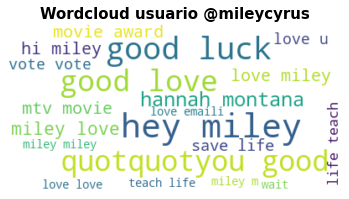

In [30]:
wordcloud(corpustr(corpus_stemUno), top_user_tuit.User[0], 20)

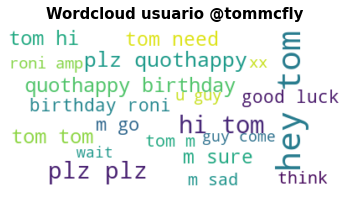

In [31]:
wordcloud(corpustr(corpus_stemDos), top_user_tuit.User[1], 20)

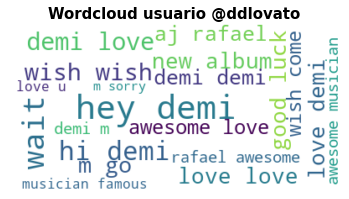

In [32]:
wordcloud(corpustr(corpus_stemTres), top_user_tuit.User[2], 20)